# Installing LazyPredict

In [ ]:
pip install lazypredict

# Imports

In [2]:
import lazypredict 
from lazypredict import Supervised 
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,5)

## Loading Data

In [3]:
data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=.33,random_state =12)

# Listing all different Classifiers available 

In [4]:
for i in range(29):
    print(i+1, lazypredict.Supervised.CLASSIFIERS[i][0])

1 AdaBoostClassifier
2 BaggingClassifier
3 BernoulliNB
4 CalibratedClassifierCV
5 CategoricalNB
6 DecisionTreeClassifier
7 DummyClassifier
8 ExtraTreeClassifier
9 ExtraTreesClassifier
10 GaussianNB
11 KNeighborsClassifier
12 LabelPropagation
13 LabelSpreading
14 LinearDiscriminantAnalysis
15 LinearSVC
16 LogisticRegression
17 NearestCentroid
18 NuSVC
19 PassiveAggressiveClassifier
20 Perceptron
21 QuadraticDiscriminantAnalysis
22 RandomForestClassifier
23 RidgeClassifier
24 RidgeClassifierCV
25 SGDClassifier
26 SVC
27 StackingClassifier
28 XGBClassifier
29 LGBMClassifier


# Training 

In [5]:
%%time
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     random_state=12,
                     classifiers='all',
                    )
models,predictions = clf.fit(X_train, X_valid, y_train, y_valid)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.45it/s]

Wall time: 1.78 s


# Results

In [6]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.98,0.98,0.98,0.02
LinearSVC,0.98,0.97,0.97,0.98,0.01
SGDClassifier,0.97,0.96,0.96,0.97,0.01
Perceptron,0.97,0.96,0.96,0.97,0.01
PassiveAggressiveClassifier,0.96,0.95,0.95,0.96,0.01
SVC,0.96,0.95,0.95,0.96,0.01
LinearDiscriminantAnalysis,0.96,0.94,0.94,0.96,0.01
LabelPropagation,0.95,0.94,0.94,0.95,0.02
LabelSpreading,0.95,0.94,0.94,0.95,0.02


# TOP 5 Classifiers

In [7]:
models.head(5)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.98,0.98,0.98,0.02
LinearSVC,0.98,0.97,0.97,0.98,0.01
SGDClassifier,0.97,0.96,0.96,0.97,0.01
Perceptron,0.97,0.96,0.96,0.97,0.01
PassiveAggressiveClassifier,0.96,0.95,0.95,0.96,0.01


# Visualizing Results

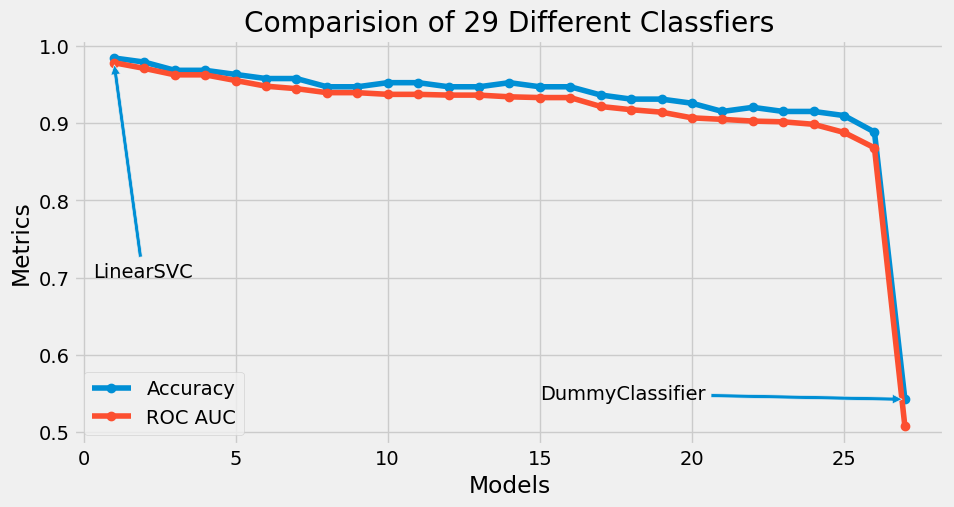

In [8]:
idx = [i for i in range(1,28)]
plt.plot(idx, models["Accuracy"]  ,marker='o' , label = "Accuracy" )
plt.plot(idx , models["ROC AUC"] , marker ='o' , label = "ROC AUC")

plt.annotate(models.index[1] , 
             (1,models["Accuracy"][1]) , 
             xytext  =(0.3, 00.7),
             arrowprops = dict(
                               arrowstyle = "simple"
                              ))
plt.annotate(models.index[26] , 
             (27 , models["Accuracy"][26]) , 
             xytext  =(15, models["Accuracy"][26]),
             arrowprops = dict(
                               arrowstyle = "simple"
                              ))
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.title("Comparison of 29 Different Classifiers")
plt.legend()
plt.show()